In [115]:
import numpy as np
import pandas as pd
import sklearn
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import rmsprop
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import utils
from sklearn.model_selection import KFold

In [117]:
dia=pd.read_csv('diabetes.csv')
# dia.head()
# dia=dia.iloc[np.random.permutation(len(dia))] #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
                                                           # see upper link                
dia= sklearn.utils.shuffle(dia)    
dia


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
494,3,80,0,0,0,0.0,0.174,22,0
727,0,141,84,26,0,32.4,0.433,22,0
557,8,110,76,0,0,27.8,0.237,58,0
640,0,102,86,17,105,29.3,0.695,27,0
276,7,106,60,24,0,26.5,0.296,29,1
...,...,...,...,...,...,...,...,...,...
321,3,112,74,30,0,31.6,0.197,25,1
123,5,132,80,0,0,26.8,0.186,69,0
479,4,132,86,31,0,28.0,0.419,63,0
476,2,105,80,45,191,33.7,0.711,29,1


In [125]:
train, validate, test = np.split(dia.sample(frac=1), [int(.7*len(dia)), int(0.8*len(dia))])
print('train shape:',train.shape)
print('validate:',validate.shape)
print('test shape:',test.shape)
print('data shape:',dia.shape)
X_train = train.iloc[:,0:-1].values
y_train= train.iloc[:,-1].values
encoder =  LabelEncoder()
y_train= encoder.fit_transform(y_train)
Y_train = pd.get_dummies(y_train).values
##########################
X_test = test.iloc[:,0:-1].values
y_test= test.iloc[:,-1].values
encoder =  LabelEncoder()
y_test= encoder.fit_transform(y_test)
Y_test = pd.get_dummies(y_test).values
##########################
X_validate = validate.iloc[:,0:-1].values
y_validate= validate.iloc[:,-1].values
encoder =  LabelEncoder()
y_validate= encoder.fit_transform(y_validate)
Y_validate = pd.get_dummies(y_validate).values




train shape: (537, 9)
validate: (77, 9)
test shape: (154, 9)
data shape: (768, 9)


In [131]:
model = Sequential()
model.add(Dense(16,input_shape=(8,), activation='relu') )
model.add(layers.Dropout(0.4))
model.add(Dense(16,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(Dense(2,activation='sigmoid')) 
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
#####################################################################################


In [132]:
history=model.fit(X_train, Y_train, epochs=20,batch_size=1,validation_data=(X_validate,Y_validate))


Train on 537 samples, validate on 77 samples
Epoch 1/20
537/537 [==============================] - 3s 5ms/step - loss: 7.1489 - accuracy: 0.5428 - val_loss: 1.0735 - val_accuracy: 0.6104
Epoch 2/20
537/537 [==============================] - 2s 3ms/step - loss: 2.8585 - accuracy: 0.5419 - val_loss: 0.7733 - val_accuracy: 0.5974
Epoch 3/20
537/537 [==============================] - 2s 3ms/step - loss: 1.5292 - accuracy: 0.6127 - val_loss: 0.7137 - val_accuracy: 0.6234
Epoch 4/20
537/537 [==============================] - 2s 3ms/step - loss: 1.0315 - accuracy: 0.6192 - val_loss: 0.6899 - val_accuracy: 0.5649
Epoch 5/20
537/537 [==============================] - 2s 3ms/step - loss: 1.0072 - accuracy: 0.6350 - val_loss: 0.6838 - val_accuracy: 0.5649
Epoch 6/20
537/537 [==============================] - 2s 3ms/step - loss: 0.8108 - accuracy: 0.6508 - val_loss: 0.6835 - val_accuracy: 0.5584
Epoch 7/20
537/537 [==============================] - 2s 4ms/step - loss: 0.8596 - accuracy: 0.6564 - v

In [112]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc:', test_acc)
print('test_loss:',test_loss)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print('train_acc:', np.mean(acc) )
print('val_acc:',np.mean(val_acc))
history_dict=history.history
# DF=pd.DataFrame(history_dict)
# DF
#export_csv = DF.to_csv (r'C:\Users\Muhammad hamza\Desktop\export_dataframe.csv', index = None, header=True)

154/154 [==============================] - 0s 125us/step
test_acc: 0.6753246784210205
test_loss: 0.6355037650504669
train_acc: 0.6430169
val_acc: 0.6285714149475098


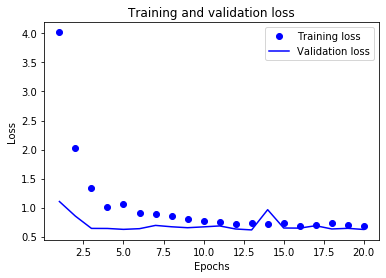

<Figure size 432x288 with 0 Axes>

In [113]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

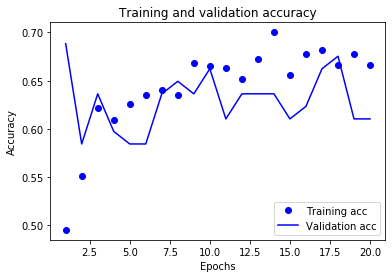

In [114]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()